1. 문제 정의하기<br>
<br>
다층 퍼셉트론 신경망 모델은 가장 기본적인 모델이라 대부분의 문제에 적용할 수 있다.<br>
데이터셋을 준비하기에 앞서, 매번 실행 시마다 결과가 달라지도록 않도록 랜덤 시드를 명시적으로 지정한다.<br>
이것을 하지 않으면 매번 실행 시마다 동일 모델임에도 불구하고 다른 결과가 나오기 때문에 연구 개발 단계에서 파라미터 조정이나 데이터셋에 따른 결과 차이를 보려면 랜덤시드를 지정해주는 것이 좋다.

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

2. 데이터 준비하기<br>
<br>
오픈 데이터셋은 데이터에 관한 설명이 포함되어있다.<br>
주요 항목 : 인스턴스 수, 속성 수, 클래스 수<br>
실제 데이터 파일은 엑셀이나 메모장으로 확인할 수 있다. CSV 형태로 되어있다.<br>
numpy 패키지에서 제공하는 loadtxt() 함수를 통해 데이터를 불러온다

>dataset = np.loadtext("./path/data.data",delimiter='')

캐글에서는 받아온 데이터는 아래 코드로 사용한다. 아래는 참고사이트다<br> 
https://disq.us/url?url=https%3A%2F%2Fwww.kaggle.com%2Fuciml%2Fpima-indians-diabetes-database%3APyV1D3bLOFa7GgXV58oNGZytVbw&cuid=4784105<br>

>import pandas as pd <br>
>dataset = pd.read_csv("./path/data.csv", delimiter=",") <br>
>dataset = dataset.values <br>

In [27]:
import pandas as pd
dataset = pd.read_csv("./data/diabetes.csv", delimiter=",")
dataset = dataset.values

3. 데이터셋 생성하기<br>
<br>
데이터셋에는 속성값과 판정결과가 모두 포함되어 있기 때문에 입력(속성값 : 8개)과 출력(판정결과 : 1개) 변수로 분리한다.

>x_train = dataset[:700,0:8] <br>
>y_train = dataset[:700,8] <br>
>x_test = dataset[700:,0:8] <br>
>y_test = dataset[700:,0:8] 

In [28]:
x_train = dataset[:700,0:8]
x_test = dataset[700:,0:8]

y_train = dataset[:700,8] 
y_test = dataset[700:,8]

4. 모델 구성하기<br>
<br>
Dense 레이어만을 사용하여 다층 퍼셉트론 신경망 모델을 구성할 수 있다.<br>
속성이 8개이기 때문에 입력 뉴런이 8개이고 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력 뉴런이 1개이다.

>첫 번째 Dense 레이어는 은닉층(hidden layer)으로 8개 뉴런을 입력받아 12개 뉴런을 출력한다.<br>
>두 번째 Dense 레이어는 은닉층으로 12개 입력받아 8개 뉴런을 출력한다.<br>
>마지막 Dense 레이어는 출력 레이어로 8개 뉴런을 입력받아 1개 뉴런을 출력한다.

In [29]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, input_dim = 12, activation = 'relu'))
model.add(Dense(1, input_dim = 8, activation = 'sigmoid'))

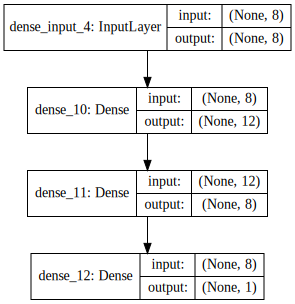

In [30]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

5. 모델 학습과정 설정하기<br>
<br>
모델을 정의하였다면 모델을 손실함수롸 최적화 알고리즘으로 엮어본다.<br>

>loss : 현재 가중치 세트를 평가하는데 사용한 손실함수. 이진 클래스이므로 'binary_crossentropy'으로 지정<br>
>optimizer :  최적의 가중치를 검색하는데 사용하는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 중 하나인 'adam'을 사용<br>
>metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 'accuracy'으로 지정

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

6. 모델 학습시키기<br>
<br>
모델을 학습시키기 위해서는 fit() 함수를 사용한다.<br>

>첫 번째 인자 : 입력 변수이다. 8개의 속성을 담고 있는 X를 입력한다.<br>
>두 번째 인자 : 출력 변수 즉 라벨값이다. 결과값을 담고 있는 Y를 입력한다.<br>
>nb_epoch : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정한다. 1500이라 칭하면 1500번 반복 학습한다.<br>
>batch_size : 가중치를 업데이트할 배치 크기를 의미한다.

In [32]:
model.fit(x_train,y_train, nb_epoch=1500, batch_size=64)

Epoch 1/1500
700/700 [==============================] - 0s - loss: 5.3063 - acc: 0.6586     
Epoch 2/1500
700/700 [==============================] - 0s - loss: 5.2166 - acc: 0.6657     
Epoch 3/1500
700/700 [==============================] - 0s - loss: 5.0190 - acc: 0.6657     
Epoch 4/1500
700/700 [==============================] - 0s - loss: 4.4767 - acc: 0.6629     
Epoch 5/1500
700/700 [==============================] - 0s - loss: 3.8786 - acc: 0.6643     
Epoch 6/1500
700/700 [==============================] - 0s - loss: 3.4889 - acc: 0.6543     
Epoch 7/1500
700/700 [==============================] - 0s - loss: 3.2795 - acc: 0.6357     
Epoch 8/1500
700/700 [==============================] - 0s - loss: 3.1651 - acc: 0.6171     
Epoch 9/1500
700/700 [==============================] - 0s - loss: 3.1117 - acc: 0.5886     
Epoch 10/1500
700/700 [==============================] - 0s - loss: 3.0691 - acc: 0.5686     
Epoch 11/1500
700/700 [==============================] - 0s - loss: 3

700/700 [==============================] - 0s - loss: 0.5696 - acc: 0.7029     
Epoch 89/1500
700/700 [==============================] - 0s - loss: 0.5711 - acc: 0.7014     
Epoch 90/1500
700/700 [==============================] - 0s - loss: 0.5691 - acc: 0.7029     
Epoch 91/1500
700/700 [==============================] - 0s - loss: 0.5673 - acc: 0.7086     
Epoch 92/1500
700/700 [==============================] - 0s - loss: 0.5672 - acc: 0.7043     
Epoch 93/1500
700/700 [==============================] - 0s - loss: 0.5667 - acc: 0.7043     
Epoch 94/1500
700/700 [==============================] - 0s - loss: 0.5684 - acc: 0.7000     
Epoch 95/1500
700/700 [==============================] - 0s - loss: 0.5677 - acc: 0.7071     
Epoch 96/1500
700/700 [==============================] - 0s - loss: 0.5689 - acc: 0.6986     
Epoch 97/1500
700/700 [==============================] - 0s - loss: 0.5676 - acc: 0.7043     
Epoch 98/1500
700/700 [==============================] - 0s - loss: 0.5722

700/700 [==============================] - 0s - loss: 0.5638 - acc: 0.6986     
Epoch 175/1500
700/700 [==============================] - 0s - loss: 0.5588 - acc: 0.7029     
Epoch 176/1500
700/700 [==============================] - 0s - loss: 0.5588 - acc: 0.7029     
Epoch 177/1500
700/700 [==============================] - 0s - loss: 0.5575 - acc: 0.7043     
Epoch 178/1500
700/700 [==============================] - 0s - loss: 0.5559 - acc: 0.7043     
Epoch 179/1500
700/700 [==============================] - 0s - loss: 0.5550 - acc: 0.7057     
Epoch 180/1500
700/700 [==============================] - 0s - loss: 0.5556 - acc: 0.7029     
Epoch 181/1500
700/700 [==============================] - 0s - loss: 0.5590 - acc: 0.7086     
Epoch 182/1500
700/700 [==============================] - 0s - loss: 0.5607 - acc: 0.7029     
Epoch 183/1500
700/700 [==============================] - 0s - loss: 0.5577 - acc: 0.7071     
Epoch 184/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.5513 - acc: 0.7071     
Epoch 261/1500
700/700 [==============================] - 0s - loss: 0.5469 - acc: 0.7071     
Epoch 262/1500
700/700 [==============================] - 0s - loss: 0.5478 - acc: 0.7043     
Epoch 263/1500
700/700 [==============================] - 0s - loss: 0.5479 - acc: 0.7071     
Epoch 264/1500
700/700 [==============================] - 0s - loss: 0.5477 - acc: 0.7086     
Epoch 265/1500
700/700 [==============================] - 0s - loss: 0.5478 - acc: 0.7114     
Epoch 266/1500
700/700 [==============================] - 0s - loss: 0.5496 - acc: 0.7100     
Epoch 267/1500
700/700 [==============================] - 0s - loss: 0.5463 - acc: 0.7129     
Epoch 268/1500
700/700 [==============================] - 0s - loss: 0.5477 - acc: 0.7057     
Epoch 269/1500
700/700 [==============================] - 0s - loss: 0.5525 - acc: 0.7100     
Epoch 270/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.5493 - acc: 0.7100     
Epoch 347/1500
700/700 [==============================] - 0s - loss: 0.5464 - acc: 0.7100     
Epoch 348/1500
700/700 [==============================] - 0s - loss: 0.5544 - acc: 0.7100     
Epoch 349/1500
700/700 [==============================] - 0s - loss: 0.5500 - acc: 0.7143     
Epoch 350/1500
700/700 [==============================] - 0s - loss: 0.5463 - acc: 0.7143     
Epoch 351/1500
700/700 [==============================] - 0s - loss: 0.5436 - acc: 0.7129     
Epoch 352/1500
700/700 [==============================] - 0s - loss: 0.5425 - acc: 0.7143     
Epoch 353/1500
700/700 [==============================] - ETA: 0s - loss: 0.5948 - acc: 0.656 - 0s - loss: 0.5418 - acc: 0.7157     
Epoch 354/1500
700/700 [==============================] - 0s - loss: 0.5427 - acc: 0.7171     
Epoch 355/1500
700/700 [==============================] - 0s - loss: 0.5433 - acc: 0.7157     
Epoch 356/1500
700/700 [===

700/700 [==============================] - 0s - loss: 0.5389 - acc: 0.7171     
Epoch 433/1500
700/700 [==============================] - 0s - loss: 0.5394 - acc: 0.7200     
Epoch 434/1500
700/700 [==============================] - 0s - loss: 0.5395 - acc: 0.7186     
Epoch 435/1500
700/700 [==============================] - 0s - loss: 0.5397 - acc: 0.7186     
Epoch 436/1500
700/700 [==============================] - 0s - loss: 0.5386 - acc: 0.7186     
Epoch 437/1500
700/700 [==============================] - 0s - loss: 0.5382 - acc: 0.7171     
Epoch 438/1500
700/700 [==============================] - 0s - loss: 0.5414 - acc: 0.7200     
Epoch 439/1500
700/700 [==============================] - 0s - loss: 0.5384 - acc: 0.7186     
Epoch 440/1500
700/700 [==============================] - 0s - loss: 0.5391 - acc: 0.7186     
Epoch 441/1500
700/700 [==============================] - 0s - loss: 0.5427 - acc: 0.7186     
Epoch 442/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.5281 - acc: 0.7243     
Epoch 519/1500
700/700 [==============================] - 0s - loss: 0.5298 - acc: 0.7214     
Epoch 520/1500
700/700 [==============================] - 0s - loss: 0.5267 - acc: 0.7214     
Epoch 521/1500
700/700 [==============================] - 0s - loss: 0.5295 - acc: 0.7200     
Epoch 522/1500
700/700 [==============================] - 0s - loss: 0.5268 - acc: 0.7214     
Epoch 523/1500
700/700 [==============================] - 0s - loss: 0.5278 - acc: 0.7186     
Epoch 524/1500
700/700 [==============================] - 0s - loss: 0.5263 - acc: 0.7229     
Epoch 525/1500
700/700 [==============================] - 0s - loss: 0.5269 - acc: 0.7229     
Epoch 526/1500
700/700 [==============================] - 0s - loss: 0.5271 - acc: 0.7243     
Epoch 527/1500
700/700 [==============================] - 0s - loss: 0.5247 - acc: 0.7214     
Epoch 528/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.4975 - acc: 0.7229     
Epoch 605/1500
700/700 [==============================] - 0s - loss: 0.4995 - acc: 0.7229     
Epoch 606/1500
700/700 [==============================] - 0s - loss: 0.4965 - acc: 0.7271     
Epoch 607/1500
700/700 [==============================] - 0s - loss: 0.4964 - acc: 0.7243     
Epoch 608/1500
700/700 [==============================] - 0s - loss: 0.4962 - acc: 0.7214     
Epoch 609/1500
700/700 [==============================] - 0s - loss: 0.4987 - acc: 0.7243     
Epoch 610/1500
700/700 [==============================] - 0s - loss: 0.4988 - acc: 0.7229     
Epoch 611/1500
700/700 [==============================] - 0s - loss: 0.4993 - acc: 0.7200     
Epoch 612/1500
700/700 [==============================] - 0s - loss: 0.5097 - acc: 0.7143     
Epoch 613/1500
700/700 [==============================] - 0s - loss: 0.4958 - acc: 0.7229     
Epoch 614/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.4861 - acc: 0.7214     
Epoch 691/1500
700/700 [==============================] - 0s - loss: 0.4848 - acc: 0.7257     
Epoch 692/1500
700/700 [==============================] - 0s - loss: 0.4824 - acc: 0.7271     
Epoch 693/1500
700/700 [==============================] - 0s - loss: 0.4835 - acc: 0.7243     
Epoch 694/1500
700/700 [==============================] - 0s - loss: 0.4827 - acc: 0.7243     
Epoch 695/1500
700/700 [==============================] - 0s - loss: 0.4881 - acc: 0.7214     
Epoch 696/1500
700/700 [==============================] - 0s - loss: 0.4886 - acc: 0.7229     
Epoch 697/1500
700/700 [==============================] - 0s - loss: 0.4883 - acc: 0.7214     
Epoch 698/1500
700/700 [==============================] - 0s - loss: 0.4845 - acc: 0.7229     
Epoch 699/1500
700/700 [==============================] - 0s - loss: 0.4820 - acc: 0.7271     
Epoch 700/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.4783 - acc: 0.7643     
Epoch 777/1500
700/700 [==============================] - 0s - loss: 0.4806 - acc: 0.7443     
Epoch 778/1500
700/700 [==============================] - 0s - loss: 0.4778 - acc: 0.7529     
Epoch 779/1500
700/700 [==============================] - 0s - loss: 0.4793 - acc: 0.7486     
Epoch 780/1500
700/700 [==============================] - 0s - loss: 0.4760 - acc: 0.7457     
Epoch 781/1500
700/700 [==============================] - 0s - loss: 0.4754 - acc: 0.7671     
Epoch 782/1500
700/700 [==============================] - 0s - loss: 0.4774 - acc: 0.7414     
Epoch 783/1500
700/700 [==============================] - 0s - loss: 0.4788 - acc: 0.7543     
Epoch 784/1500
700/700 [==============================] - 0s - loss: 0.4769 - acc: 0.7629     
Epoch 785/1500
700/700 [==============================] - 0s - loss: 0.4751 - acc: 0.7486     
Epoch 786/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.4698 - acc: 0.7529     
Epoch 863/1500
700/700 [==============================] - 0s - loss: 0.4716 - acc: 0.7614     
Epoch 864/1500
700/700 [==============================] - 0s - loss: 0.4770 - acc: 0.7471     
Epoch 865/1500
700/700 [==============================] - 0s - loss: 0.4691 - acc: 0.7657     
Epoch 866/1500
700/700 [==============================] - ETA: 0s - loss: 0.4912 - acc: 0.750 - 0s - loss: 0.4714 - acc: 0.7571     
Epoch 867/1500
700/700 [==============================] - 0s - loss: 0.4723 - acc: 0.7657     
Epoch 868/1500
700/700 [==============================] - 0s - loss: 0.4676 - acc: 0.7600     
Epoch 869/1500
700/700 [==============================] - 0s - loss: 0.4719 - acc: 0.7543     
Epoch 870/1500
700/700 [==============================] - 0s - loss: 0.4692 - acc: 0.7600     
Epoch 871/1500
700/700 [==============================] - 0s - loss: 0.4705 - acc: 0.7529     
Epoch 872/1500
700/700 [===

700/700 [==============================] - 0s - loss: 0.4695 - acc: 0.7600     
Epoch 949/1500
700/700 [==============================] - 0s - loss: 0.4723 - acc: 0.7586     
Epoch 950/1500
700/700 [==============================] - 0s - loss: 0.4644 - acc: 0.7586     
Epoch 951/1500
700/700 [==============================] - 0s - loss: 0.4683 - acc: 0.7671     
Epoch 952/1500
700/700 [==============================] - 0s - loss: 0.4628 - acc: 0.7614     
Epoch 953/1500
700/700 [==============================] - 0s - loss: 0.4652 - acc: 0.7643     
Epoch 954/1500
700/700 [==============================] - 0s - loss: 0.4675 - acc: 0.7686     
Epoch 955/1500
700/700 [==============================] - 0s - loss: 0.4663 - acc: 0.7571     
Epoch 956/1500
700/700 [==============================] - 0s - loss: 0.4675 - acc: 0.7571     
Epoch 957/1500
700/700 [==============================] - 0s - loss: 0.4713 - acc: 0.7514     
Epoch 958/1500
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.4607 - acc: 0.7643     
Epoch 1035/1500
700/700 [==============================] - 0s - loss: 0.4583 - acc: 0.7686     
Epoch 1036/1500
700/700 [==============================] - 0s - loss: 0.4616 - acc: 0.7614     
Epoch 1037/1500
700/700 [==============================] - 0s - loss: 0.4666 - acc: 0.7586     
Epoch 1038/1500
700/700 [==============================] - 0s - loss: 0.4614 - acc: 0.7657     
Epoch 1039/1500
700/700 [==============================] - 0s - loss: 0.4586 - acc: 0.7629     
Epoch 1040/1500
700/700 [==============================] - 0s - loss: 0.4597 - acc: 0.7657     
Epoch 1041/1500
700/700 [==============================] - 0s - loss: 0.4600 - acc: 0.7643     
Epoch 1042/1500
700/700 [==============================] - 0s - loss: 0.4584 - acc: 0.7671     
Epoch 1043/1500
700/700 [==============================] - 0s - loss: 0.4572 - acc: 0.7700     
Epoch 1044/1500
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.4566 - acc: 0.7614     
Epoch 1120/1500
700/700 [==============================] - 0s - loss: 0.4535 - acc: 0.7629     
Epoch 1121/1500
700/700 [==============================] - 0s - loss: 0.4597 - acc: 0.7543     
Epoch 1122/1500
700/700 [==============================] - 0s - loss: 0.4582 - acc: 0.7657     
Epoch 1123/1500
700/700 [==============================] - 0s - loss: 0.4591 - acc: 0.7743     
Epoch 1124/1500
700/700 [==============================] - 0s - loss: 0.4554 - acc: 0.7629     
Epoch 1125/1500
700/700 [==============================] - 0s - loss: 0.4581 - acc: 0.7614     
Epoch 1126/1500
700/700 [==============================] - 0s - loss: 0.4572 - acc: 0.7586     
Epoch 1127/1500
700/700 [==============================] - 0s - loss: 0.4556 - acc: 0.7671     
Epoch 1128/1500
700/700 [==============================] - 0s - loss: 0.4495 - acc: 0.7700     
Epoch 1129/1500
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.4402 - acc: 0.7729     
Epoch 1205/1500
700/700 [==============================] - 0s - loss: 0.4418 - acc: 0.7829     
Epoch 1206/1500
700/700 [==============================] - 0s - loss: 0.4390 - acc: 0.7786     
Epoch 1207/1500
700/700 [==============================] - 0s - loss: 0.4357 - acc: 0.7786     
Epoch 1208/1500
700/700 [==============================] - 0s - loss: 0.4405 - acc: 0.7700     
Epoch 1209/1500
700/700 [==============================] - 0s - loss: 0.4376 - acc: 0.7771     
Epoch 1210/1500
700/700 [==============================] - 0s - loss: 0.4400 - acc: 0.7729     
Epoch 1211/1500
700/700 [==============================] - 0s - loss: 0.4350 - acc: 0.7843     
Epoch 1212/1500
700/700 [==============================] - 0s - loss: 0.4380 - acc: 0.7814     
Epoch 1213/1500
700/700 [==============================] - 0s - loss: 0.4377 - acc: 0.7786     
Epoch 1214/1500
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.4278 - acc: 0.7857     
Epoch 1290/1500
700/700 [==============================] - 0s - loss: 0.4278 - acc: 0.7843     
Epoch 1291/1500
700/700 [==============================] - 0s - loss: 0.4269 - acc: 0.7786     
Epoch 1292/1500
700/700 [==============================] - 0s - loss: 0.4294 - acc: 0.7771     
Epoch 1293/1500
700/700 [==============================] - 0s - loss: 0.4318 - acc: 0.7929     
Epoch 1294/1500
700/700 [==============================] - 0s - loss: 0.4308 - acc: 0.7700     
Epoch 1295/1500
700/700 [==============================] - 0s - loss: 0.4368 - acc: 0.7629     
Epoch 1296/1500
700/700 [==============================] - 0s - loss: 0.4298 - acc: 0.7729     
Epoch 1297/1500
700/700 [==============================] - 0s - loss: 0.4290 - acc: 0.7814     
Epoch 1298/1500
700/700 [==============================] - 0s - loss: 0.4369 - acc: 0.7643     
Epoch 1299/1500
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.4207 - acc: 0.7843     
Epoch 1374/1500
700/700 [==============================] - 0s - loss: 0.4201 - acc: 0.7957     
Epoch 1375/1500
700/700 [==============================] - 0s - loss: 0.4192 - acc: 0.8014     
Epoch 1376/1500
700/700 [==============================] - 0s - loss: 0.4202 - acc: 0.7957     
Epoch 1377/1500
700/700 [==============================] - 0s - loss: 0.4207 - acc: 0.7943     
Epoch 1378/1500
700/700 [==============================] - 0s - loss: 0.4189 - acc: 0.8014     
Epoch 1379/1500
700/700 [==============================] - 0s - loss: 0.4214 - acc: 0.7943     
Epoch 1380/1500
700/700 [==============================] - 0s - loss: 0.4251 - acc: 0.7929     
Epoch 1381/1500
700/700 [==============================] - 0s - loss: 0.4234 - acc: 0.7929     
Epoch 1382/1500
700/700 [==============================] - 0s - loss: 0.4216 - acc: 0.7943     
Epoch 1383/1500
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.4165 - acc: 0.8014     
Epoch 1459/1500
700/700 [==============================] - 0s - loss: 0.4221 - acc: 0.7971     
Epoch 1460/1500
700/700 [==============================] - 0s - loss: 0.4202 - acc: 0.7886     
Epoch 1461/1500
700/700 [==============================] - 0s - loss: 0.4301 - acc: 0.7829     
Epoch 1462/1500
700/700 [==============================] - 0s - loss: 0.4189 - acc: 0.7871     
Epoch 1463/1500
700/700 [==============================] - 0s - loss: 0.4223 - acc: 0.7929     
Epoch 1464/1500
700/700 [==============================] - 0s - loss: 0.4173 - acc: 0.7929     
Epoch 1465/1500
700/700 [==============================] - 0s - loss: 0.4188 - acc: 0.7929     
Epoch 1466/1500
700/700 [==============================] - 0s - loss: 0.4131 - acc: 0.7957     
Epoch 1467/1500
700/700 [==============================] - 0s - loss: 0.4133 - acc: 0.7986     
Epoch 1468/1500
700/700 [==============================]

7. 모델 평가하기<br>
<br>
시험셋으로 학습한 모델을 평가한다.

In [33]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print '%s : %0.2f%%'  %(model.metrics_names[1], loss_and_metrics[1]*100) 

64/68 [===========================>..] - ETA: 0sacc : 73.53%
